# **Formula 1 DB**




# **Importing packages**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from IPython.display import display

### **loading CSV files from Dataset**

In [ ]:
drivers = pd.read_csv('/content/drive/MyDrive/Formula1/drivers.csv')
drivers.set_index('driverId', inplace=True)
results = pd.read_csv('/content/drive/MyDrive/Formula1/results.csv')
results.set_index('resultId', inplace=True)
constructor_results = pd.read_csv('/content/drive/MyDrive/Formula1/constructor_results.csv')
constructor_results.set_index('constructorResultsId', inplace=True)
constructors = pd.read_csv('/content/drive/MyDrive/Formula1/constructors.csv')
constructors.set_index('constructorId', inplace=True)
pit_stops = pd.read_csv('/content/drive/MyDrive/Formula1/pit_stops.csv')
pit_stops.set_index('raceId', inplace=True)
driver_standings = pd.read_csv('/content/drive/MyDrive/Formula1/driver_standings.csv')
driver_standings.set_index('driverStandingsId', inplace=True)
qualifying = pd.read_csv('/content/drive/MyDrive/Formula1/qualifying.csv')
qualifying.set_index('qualifyId', inplace=True)
constructor_standings = pd.read_csv('/content/drive/MyDrive/Formula1/constructor_standings.csv')
constructor_standings.set_index('constructorStandingsId', inplace=True)
races = pd.read_csv('/content/drive/MyDrive/Formula1/races.csv')
races.set_index('raceId', inplace=True)
lap_times = pd.read_csv('/content/drive/MyDrive/Formula1/lap_times.csv')
lap_times.set_index('raceId', inplace=True)

In [ ]:
sb.set_palette('Set3')
sb.color_palette("pastel")
plt.rcParams['figure.figsize']=10,6

# **Top 10 Drivers Winners in F1**

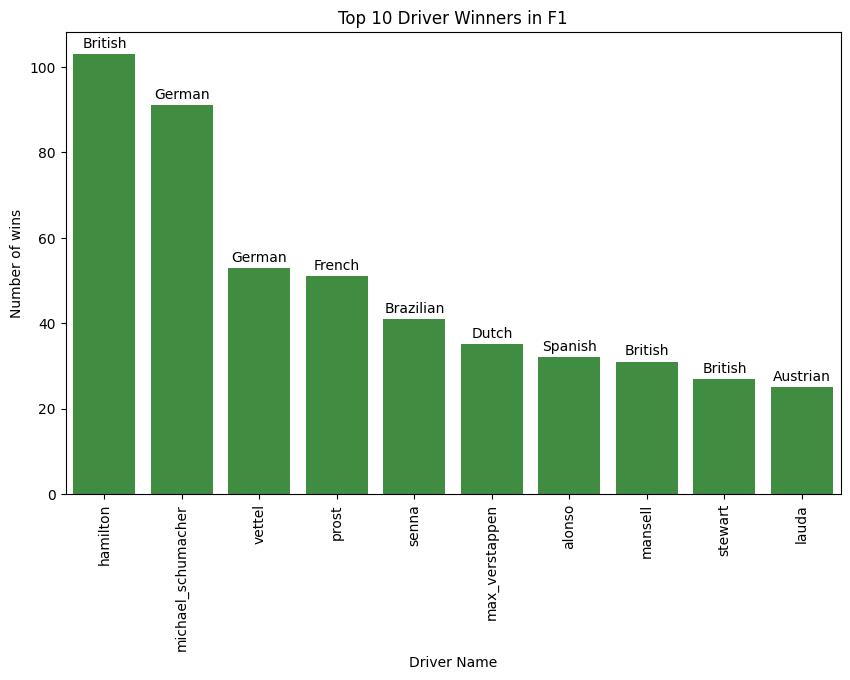

In [ ]:
#### Most Drivers Winners in F1 ####
driver_winner = results.loc[results.position=='1'].groupby(['driverId']).size().sort_values(ascending = False).to_frame().reset_index()
driver_winner_names=pd.merge(left=driver_winner,right=drivers,left_on='driverId', right_index=True)
driver_winner_names.rename(columns = {0:'no_wins'},inplace = True)
sb.barplot(data = driver_winner_names.head(10),y='no_wins',x='driverRef',color='Green',alpha=0.8,errorbar=None)
plt.title('Top 10 Driver Winners in F1')
plt.ylabel('Number of wins')
plt.xlabel('Driver Name')
plt.xticks(rotation=90);
for nationality, x in driver_winner_names.head(10).iterrows():
  plt.text(x=nationality,y=x['no_wins']+1.5,ha='center', s=x['nationality'])

# **Top 10 Constructors Winners in F1**

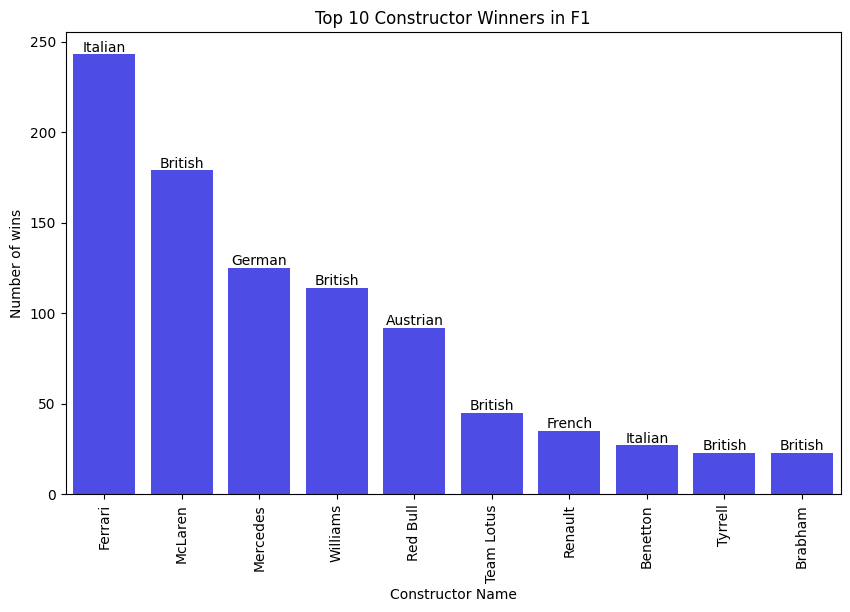

In [ ]:
#### Most constructors Winners in F1 ####
constructor_winner = results.loc[results.positionOrder==1].groupby(['constructorId']).size().sort_values(ascending = False).to_frame().reset_index()
constructor_winner_names=pd.merge(left=constructor_winner,right=constructors,left_on='constructorId', right_index=True)
constructor_winner_names.rename(columns = {0:'no_wins'},inplace = True)
sb.barplot(data = constructor_winner_names.head(10),y='no_wins',x='name',color='Blue',alpha=0.8,errorbar=None)
plt.title('Top 10 Constructor Winners in F1')
plt.ylabel('Number of wins')
plt.xlabel('Constructor Name');
plt.xticks(rotation=90);

for nationality, x in constructor_winner_names.head(10).iterrows():
  plt.text(x=nationality,y=x['no_wins']+1.5,ha='center', s=x['nationality'])

# **Driver Vs. Constructor**

In [ ]:
def get_driver_full_name(num):
  driver_name = drivers.loc[num,'forename']
  driver_name = driver_name+' '+drivers.loc[num,'surname']
  return str(driver_name)

In [ ]:
def display_table_top_drivers():
  driver_wins = results.loc[results.position=='1'].groupby(['driverId']).size().sort_values(ascending = False).to_frame().reset_index()
  driver_wins_names=pd.merge(left=driver_wins,right=drivers,left_on='driverId', right_index=True)
  driver_wins_names.drop(['number','driverRef','code','dob','nationality','url'],axis =1,inplace = True)
  driver_wins_names.rename(columns = {0:'No.Wins'},inplace = True)
  display(driver_wins_names.head(10))

In [ ]:
def get_driver_info(driver_id):
  all_driver_races = results.loc[(results.driverId == driver_id) & (results.position=='1')]
  all_driver_races=pd.merge(left=all_driver_races,right=races,left_on='raceId',right_index=True)
  all_driver_races=pd.merge(left=all_driver_races,right=constructors,left_on='constructorId', right_index=True)
  res = all_driver_races.groupby('year').agg({'name_y': 'min', 'year': 'size'}).rename({'year': 'wins'}, axis=1)
  res['wins'].plot(marker='.', alpha=0.8, color=(0.9,0.4,0.5), linewidth=4);
  plt.title(f'{get_driver_full_name(driver_id)} Wins Vs. Constructors')
  plt.ylabel('Number of wins')
  plt.xlabel('Year');
  for year, x in res.iterrows():
    plt.text(x=year, y=x['wins']+0.1,ha='center', s=x['name_y'])

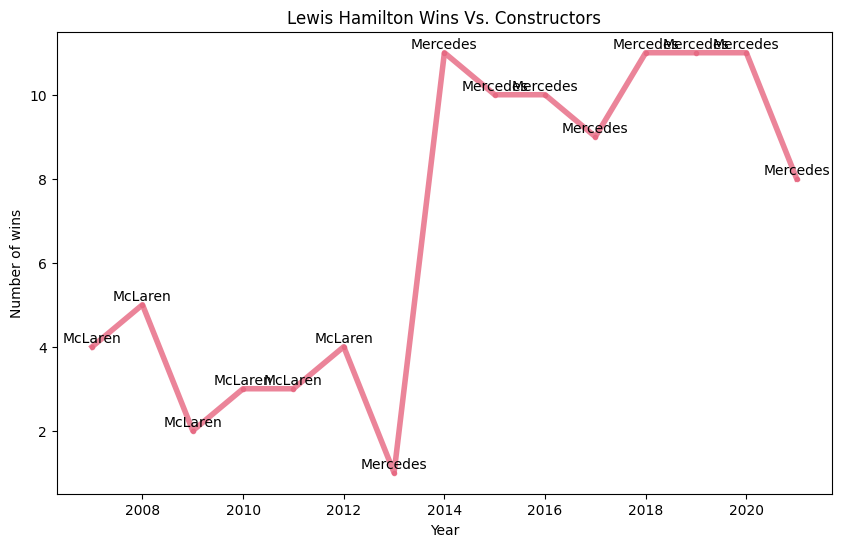

In [ ]:
get_driver_info(1)

In [ ]:
display_table_top_drivers()

,driverId,No.Wins,forename,surname
0,1,103,Lewis,Hamilton
1,30,91,Michael,Schumacher
2,20,53,Sebastian,Vettel
3,117,51,Alain,Prost
4,102,41,Ayrton,Senna
5,830,35,Max,Verstappen
6,4,32,Fernando,Alonso
7,95,31,Nigel,Mansell
8,328,27,Jackie,Stewart
9,182,25,Niki,Lauda


# **wins per year**

In [ ]:
def get_year_winners(my_year):
  year_races = races[races.year==my_year].index.tolist()
  year_results = results.loc[results.raceId.isin(year_races)]
  year_lead = year_results.loc[year_results.position=='1'].groupby('driverId').size().sort_values(ascending=False)
  pd.concat([year_lead, drivers.surname], axis=1, join='inner').set_index('surname').plot.bar(legend=None,color=(0.9,0.4,0.5))
  plt.ylabel('Number of wins')
  plt.xlabel('Driver Name');
  plt.title(f'Drivers Winners Year {my_year}')

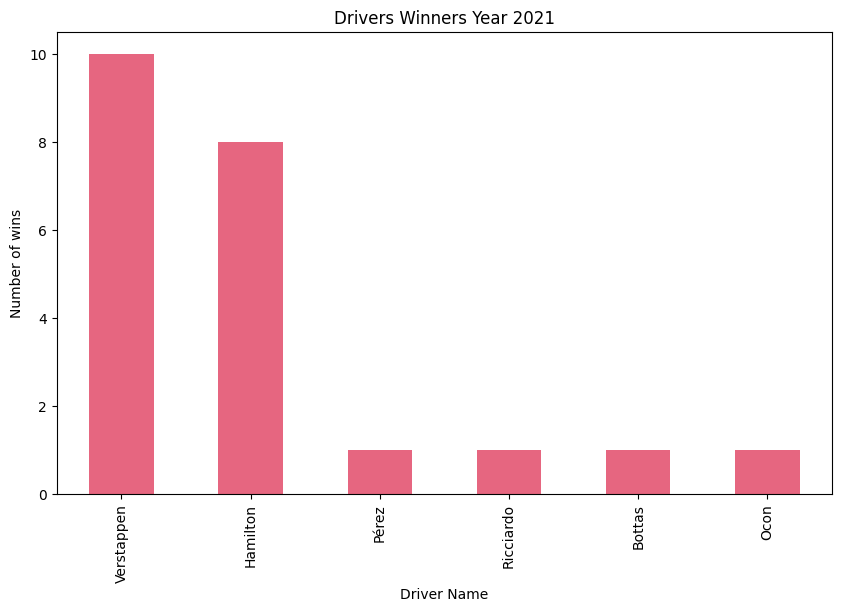

In [ ]:
get_year_winners(2021)

**# Merge Dataset, drop, re-arrange, rename & sort columns**

**Merge Dataset, drop, re-arrange, rename & sort columns**

In [ ]:
#### Merging dataset ####
df_f1 = pd.merge(results,races[['year','name','round']],left_on='raceId',right_index=True, how = 'left')
df_f1 = pd.merge(df_f1,drivers[['driverRef','nationality']],left_on='driverId',right_index=True,how ='left')
df_f1 = pd.merge(df_f1,constructors[['name','nationality']],left_on='constructorId',right_index=True,how ='left')
#### Drop unnecessary columns ####
df_f1 = df_f1.reset_index(drop=True)
#### Drop Index ####
df_f1.drop(['number','position','positionText','laps','fastestLap','statusId','raceId','driverId','constructorId'],axis =1,inplace = True)
#### Re-arranging columns ####
df_f1 = df_f1[['year','name_x','round','driverRef','name_y','grid','positionOrder','points','time',
         'milliseconds','rank','fastestLapTime','fastestLapSpeed',
        'nationality_x','nationality_y']]
#### Rename columns ####
df_f1.rename(columns = {'rank':'fastest_lap_rank','name_x':'location_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)
#### Sort columns ####
df_f1 = df_f1.sort_values(by =['year','round','positionOrder'],ascending=[False,True,True])
#### Drop Index ####
df_f1.reset_index(drop=True, inplace = True)
#### Replace Values ####
df_f1.time.replace('\\N',np.nan,inplace = True)
df_f1.milliseconds.replace('\\N',np.nan,inplace = True)
df_f1.fastest_lap_rank.replace('\\N',np.nan,inplace = True)
df_f1.fastestLapTime.replace('\\N',np.nan,inplace = True)
df_f1.fastestLapSpeed.replace('\\N',np.nan,inplace = True)

# **No. Of Drivers & Constructors in F1 since 1950**

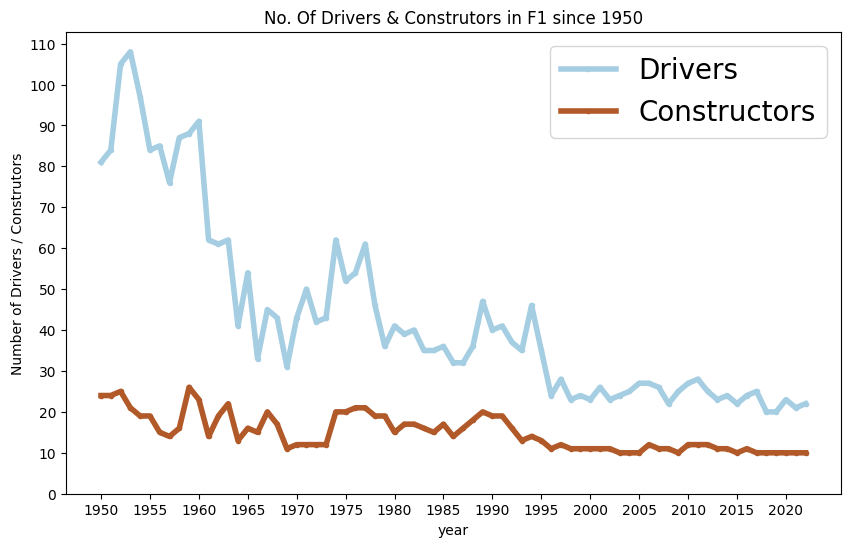

In [ ]:
#number of driver and constructors over the years
sum_drivers = df_f1.groupby('year')['driver'].nunique()
sum_constructors = df_f1.groupby('year')['constructor_name'].nunique()
pd.merge(left = sum_drivers, right = sum_constructors, on = 'year',how ='left').plot(marker='.', linewidth=4,colormap='Paired')
plt.title('No. Of Drivers & Construtors in F1 since 1950')
plt.ylabel('Number of Drivers / Construtors')
plt.yticks(np.arange(0, 120, 10))
plt.xticks(np.arange(1950, 2023, 5))
plt.legend(["Drivers", "Constructors"], fontsize="20");

# **starting position vs. Finish place since 1950 all circuits**

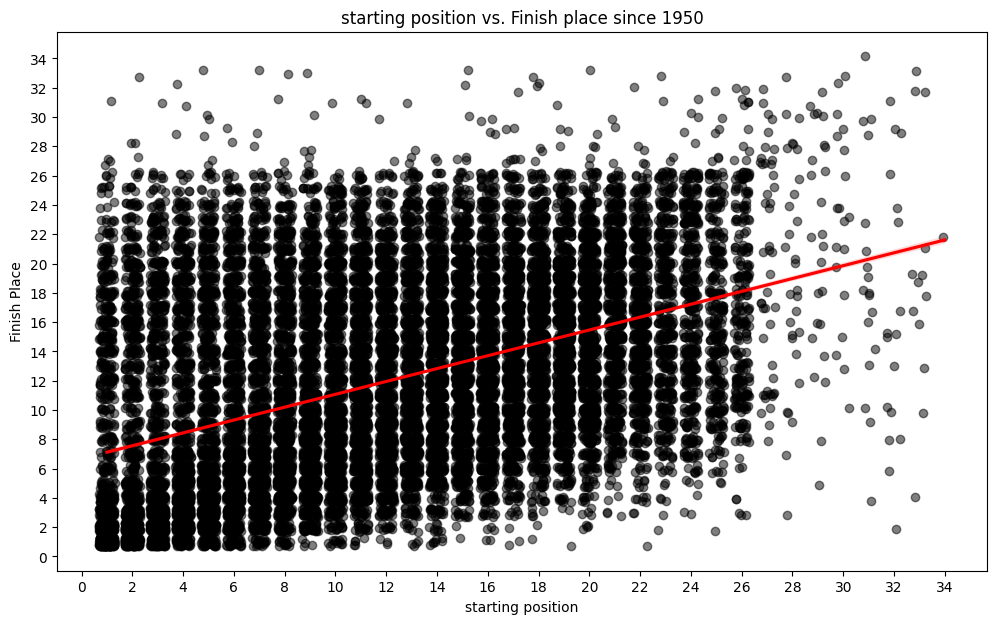

In [ ]:
df_no_zero = df_f1[df_f1['grid']!=0]

plt.figure(figsize = [12,7])

sb.regplot(data = df_no_zero, x = 'grid', y = 'positionOrder',x_jitter = 0.3,y_jitter = 0.3, scatter_kws = {"color": "black", "alpha": 0.5},line_kws = {"color": "red"});
plt.title('starting position vs. Finish place since 1950')
plt.ylabel('Finish Place')
plt.xticks(np.arange(0, 36, 2))
plt.yticks(np.arange(0, 36, 2))
plt.xlabel('starting position');

# **starting vs.Finish in Monaco Grand Prix since 2010**

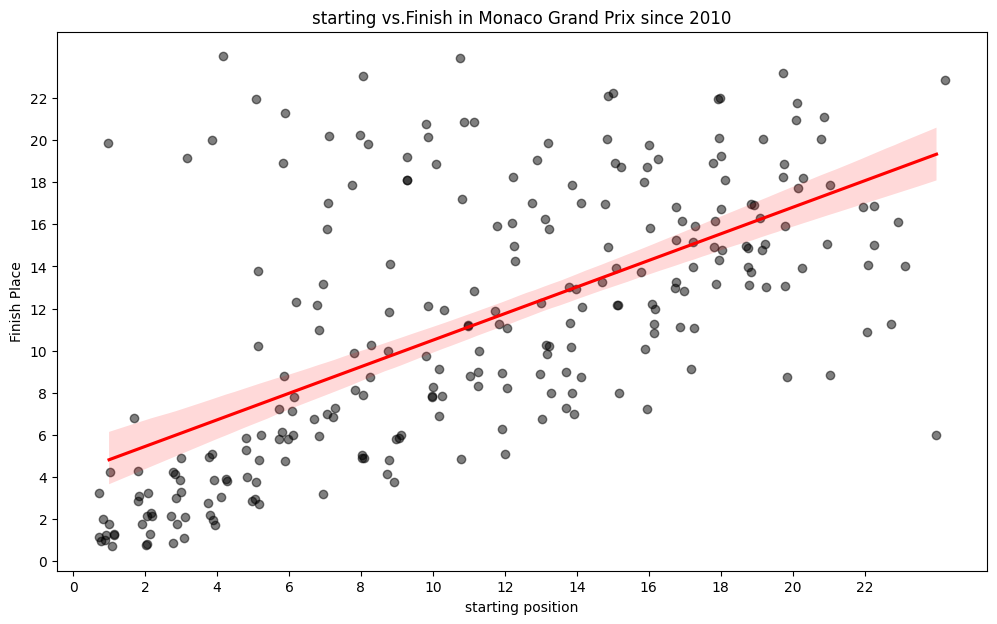

In [ ]:
f1_since_2010 = df_f1.loc[df_f1.year > 2009]
f1_since_2010= f1_since_2010.loc[f1_since_2010.location_name == 'Monaco Grand Prix']
f1_since_2010 = f1_since_2010[f1_since_2010['grid']!=0]

plt.figure(figsize = [12,7])

sb.regplot(data = f1_since_2010, x = 'grid', y = 'positionOrder',x_jitter = 0.3,y_jitter = 0.3, scatter_kws = {"color": "black", "alpha": 0.5},line_kws = {"color": "red"});
plt.title('starting vs.Finish in Monaco Grand Prix since 2010')#, fontdict = font1)
plt.ylabel('Finish Place')
plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(0, 24, 2))
plt.xlabel('starting position');

# **Drivers Position On Each Race**

In [ ]:
def get_drivers_list(race__no):
  race_lap_times_ = lap_times.loc[(lap_times.index==race__no)]
  driver__nos = race_lap_times_['driverId'].unique()
  j=0
  for driver_no in driver__nos:
    print(f'{driver__nos[j]} : {get_driver_full_name(driver__nos[j])}')
    j+=1

In [ ]:
def get_driver_full_name(num):
  driver_name = drivers.loc[num,'forename']
  driver_name = driver_name+' '+drivers.loc[num,'surname']
  return str(driver_name)

In [ ]:
def get_drivers_lap_vs_location(race_no):
  race_lap_times = lap_times.loc[(lap_times.index==race_no)]
  driver_nos = race_lap_times['driverId'].unique()

  # These are the colors that will be used in the plot
  color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

  plt.figure(figsize=(15, 5))
  j=0
  for driver_no in driver_nos:
    race_lap_times = lap_times.loc[(lap_times.index==race_no) & (lap_times.driverId == driver_no)]
    lap_no  = race_lap_times['lap'].unique()
    driver_position  = race_lap_times['position']
    plt.plot(lap_no[:len(driver_position)], driver_position,label = (f'{get_driver_full_name(driver_nos[j])}') ,marker='.', linewidth=4,color = color_sequence[j])
    j+=1
  plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="best",
                mode="expand", borderaxespad=0, ncol=3)
  plt.yticks(np.arange(0, 21, 1))
  plt.ylabel('Finish Place')
  plt.xlabel('Lap Number');
  plt.show()

In [ ]:
def get_lap_time_driver(race_no,driver_no):
  driver_laps = lap_times.loc[(lap_times.index==race_no) & (lap_times.driverId == driver_no)]
  lap_no  = driver_laps['lap'].tolist()
  driver_laps['real_time'] = driver_laps['time'].apply(lambda s: pd.Timedelta(minutes=int(s.split(':')[0]), seconds=int(s.split(':')[1].split('.')[0]), microseconds=int(s.split('.')[1])*1000))
  driver_position  = driver_laps['real_time'].dt.total_seconds().tolist()
  plt.plot(lap_no, driver_position, marker='o', linewidth=3)
  plt.ylabel('Lap Time in Sec')
  plt.xlabel('Lap Number');

In [ ]:
select_race_no = 1031

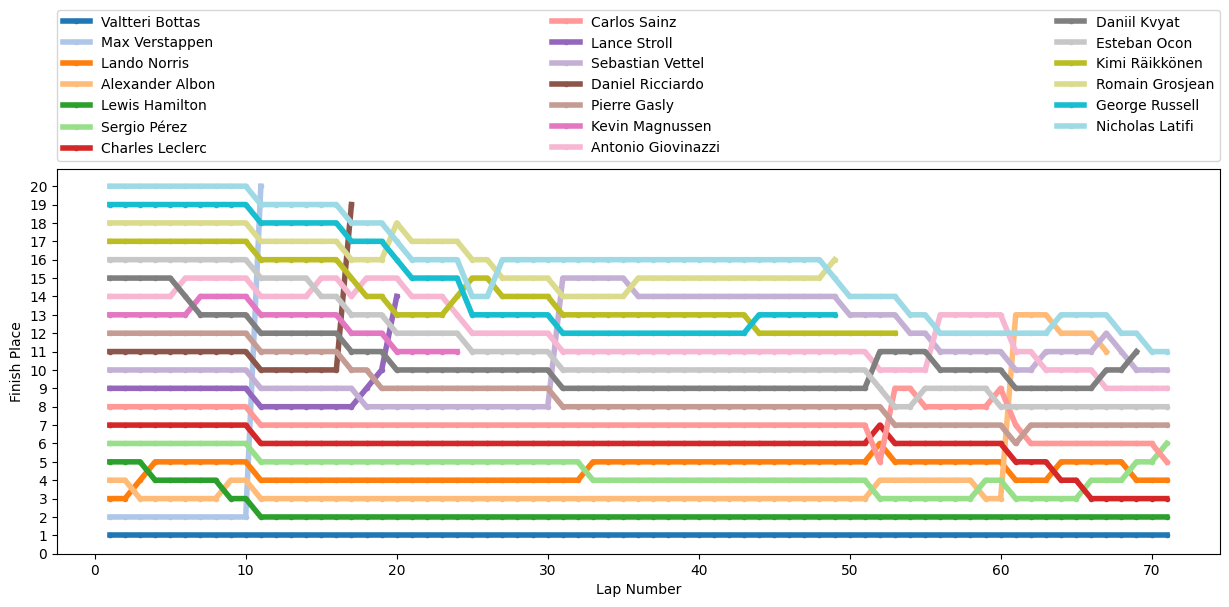

In [ ]:
get_drivers_lap_vs_location(select_race_no)

In [ ]:
get_drivers_list(select_race_no)

822 : Valtteri Bottas
830 : Max Verstappen
846 : Lando Norris
848 : Alexander Albon
1 : Lewis Hamilton
815 : Sergio Pérez
844 : Charles Leclerc
832 : Carlos Sainz
840 : Lance Stroll
20 : Sebastian Vettel
817 : Daniel Ricciardo
842 : Pierre Gasly
825 : Kevin Magnussen
841 : Antonio Giovinazzi
826 : Daniil Kvyat
839 : Esteban Ocon
8 : Kimi Räikkönen
154 : Romain Grosjean
847 : George Russell
849 : Nicholas Latifi


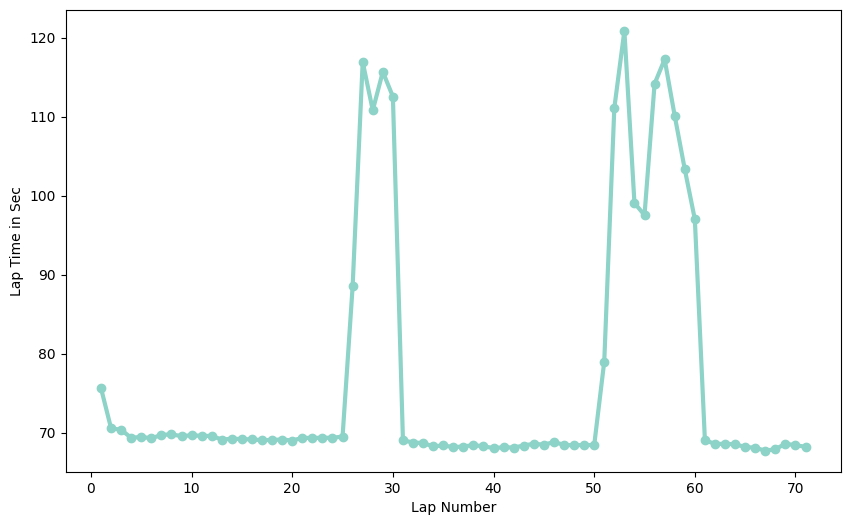

In [ ]:
import warnings
warnings.filterwarnings('ignore')
get_lap_time_driver(select_race_no,1)